# TFT "Hidden OP Analysis"
### John "PrelaunchZeus2" Salmon

In [1]:
#imports
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
#Load the Data
match_list = pl.read_csv('..\Data\match_data_100Layers.csv')
match_list.head(10)

match_id,queue_id,tft_set_number,game_version,player_puuid,name,partner_group_id,placement,total_damage_to_players,players_eliminated,traits,units
str,i64,i64,str,str,str,str,i64,i64,i64,str,str
"""NA1_5269393595""",1130,14,"""Linux Version 15.8.674.8619 (A…","""bJvwVLubhxcAcPKYq5KRhediVIHDpF…","""BABONKEY#zaza""","""Unknown""",6,8,0,"""TFT14_Armorclad(1); TFT14_Ball…","""TFT14_Morgana[tier:2, items:];…"
"""NA1_5269393595""",1130,14,"""Linux Version 15.8.674.8619 (A…","""d3ls-zl-sDdOXB4sQZ22Dx4XorqxDr…","""LunaLush#Heyyy""","""Unknown""",1,38,3,"""TFT14_Armorclad(1); TFT14_Brui…","""TFT14_DrMundo[tier:2, items:];…"
"""NA1_5269393595""",1130,14,"""Linux Version 15.8.674.8619 (A…","""aDxTDJAIQCJ399z_MuqaR13Mp-hLhp…","""itsdestinimarie#NA1""","""Unknown""",7,8,0,"""TFT14_AnimaSquad(4); TFT14_Bru…","""TFT14_Zyra[tier:2, items:TFT_I…"
"""NA1_5269393595""",1130,14,"""Linux Version 15.8.674.8619 (A…","""ovn3CmnYj7gEknZXO49ANnEB0Qqfn9…","""Posi Brandon#NA1""","""Unknown""",3,20,0,"""TFT14_Bruiser(2); TFT14_Contro…","""TFT14_Zyra[tier:3, items:]; TF…"
"""NA1_5269393595""",1130,14,"""Linux Version 15.8.674.8619 (A…","""3G27j7hBzuX9M5AQoprWrnl8pvBMqd…","""朴灿烈#914""","""Unknown""",2,28,1,"""TFT14_AnimaSquad(4); TFT14_Bal…","""TFT14_DrMundo[tier:1, items:];…"
"""NA1_5269393595""",1130,14,"""Linux Version 15.8.674.8619 (A…","""4SpB7OqqVkFmtrUZEelsHV5l9hn0Ox…","""Borougham#NA1""","""Unknown""",5,16,0,"""TFT14_AnimaSquad(1); TFT14_Bal…","""TFT14_Darius[tier:2, items:TFT…"
"""NA1_5269393595""",1130,14,"""Linux Version 15.8.674.8619 (A…","""XLqZsTodwuXHnHszjSu3_6db7MEaNz…","""Genes1s#9453""","""Unknown""",4,18,1,"""TFT14_AnimaSquad(1); TFT14_Arm…","""TFT14_NidaleeCougar[tier:2, it…"
"""NA1_5269393595""",1130,14,"""Linux Version 15.8.674.8619 (A…","""v5K6uohOIbVrp6kMOfsRxiOzQQcFV1…","""TheSwanGoesHonk#NA1""","""Unknown""",8,4,0,"""TFT14_AnimaSquad(1); TFT14_Arm…","""TFT14_KogMaw[tier:2, items:]; …"
"""NA1_5269297770""",1220,14,"""Linux Version 15.8.674.8619 (A…","""d3ls-zl-sDdOXB4sQZ22Dx4XorqxDr…","""LunaLush#Heyyy""","""Unknown""",1,0,0,"""TFT14_BallisTek(4); TFT14_Brui…","""TFT14_DrMundo[tier:2, items:];…"


In [3]:
#This analysis should focus on dobule up, normal, and ranked matches, so we need to filter the data.
match_list = match_list.filter(pl.col('queue_id').is_in([1090, 1100, 1160]))

#next we want to split the traits and units columns, they are currently strings with values separated by semicolons.
match_list = match_list.with_columns(match_list['traits'].str.split(';').alias('traits'))
match_list = match_list.with_columns(match_list['units'].str.split(';').alias('units'))
match_list.head(10)

match_id,queue_id,tft_set_number,game_version,player_puuid,name,partner_group_id,placement,total_damage_to_players,players_eliminated,traits,units
str,i64,i64,str,str,str,str,i64,i64,i64,list[str],list[str]
"""NA1_5268755014""",1160,14,"""Linux Version 15.8.673.8244 (A…","""8JV3oY85waejFoahO4QRSBQwDtUnQg…","""Eternity#NA2""","""2""",7,33,0,"[""TFT14_Armorclad(2)"", "" TFT14_EdgeRunner(3)"", … "" TFT14_Thirsty(2)""]","[""TFT14_NidaleeCougar[tier:3, items:]"", "" TFT14_Kindred[tier:3, items:]"", … "" TFT14_Elise[tier:3, items:]""]"
"""NA1_5268755014""",1160,14,"""Linux Version 15.8.673.8244 (A…","""ArDzQZPIFAn6TBbsdyDMaoM6uIcMp0…","""Hallgaar#NA1""","""2""",8,38,0,"[""TFT14_BallisTek(2)"", "" TFT14_Bruiser(6)"", … "" TFT14_Techie(2)""]","[""TFT14_Alistar[tier:2, items:]"", "" TFT14_Darius[tier:2, items:TFT_Item_Redemption,TFT_Item_RedBuff]"", … "" TFT14_Kobuko[tier:1, items:TFT_Item_ThiefsGloves,TFT_Item_AdaptiveHelm,TFT_Item_PowerGauntlet]""]"
"""NA1_5268755014""",1160,14,"""Linux Version 15.8.673.8244 (A…","""BXAbUTlXwv9DrYjjZipHPOM5jlJVmX…","""Vakin#NA1""","""1""",2,82,1,"[""TFT14_AnimaSquad(3)"", "" TFT14_Bruiser(1)"", … "" TFT14_ViegoUniqueTrait(1)""]","[""TFT14_Alistar[tier:3, items:]"", "" TFT14_Graves[tier:3, items:TFT_Item_TitansResolve,TFT_Item_Bloodthirster]"", … "" TFT14_Garen[tier:2, items:TFT_Item_SteraksGage]""]"
"""NA1_5268755014""",1160,14,"""Linux Version 15.8.673.8244 (A…","""3VabpW1yg-iRG7HSlriK5QKRrMFcB_…","""Mai#001""","""1""",1,60,2,"[""TFT14_AnimaSquad(1)"", "" TFT14_Armorclad(1)"", … "" TFT14_ViegoUniqueTrait(1)""]","[""TFT14_Zyra[tier:2, items:]"", "" TFT14_Seraphine[tier:3, items:TFT_Item_SpearOfShojin,TFT_Item_RabadonsDeathcap,TFT_Item_Leviathan]"", … "" TFT14_Ziggs[tier:1, items:TFT_Item_SpearOfShojin]""]"
"""NA1_5268755014""",1160,14,"""Linux Version 15.8.673.8244 (A…","""d3ls-zl-sDdOXB4sQZ22Dx4XorqxDr…","""LunaLush#Heyyy""","""3""",6,45,1,"[""TFT14_Armorclad(2)"", "" TFT14_BallisTek(1)"", … "" TFT14_ViegoUniqueTrait(1)""]","[""TFT14_Poppy[tier:3, items:TFT5_Item_ZzRotPortalRadiant]"", "" TFT14_Veigar[tier:3, items:TFT_Item_SpearOfShojin,TFT_Item_JeweledGauntlet,TFT_Item_BlueBuff]"", … "" TFT14_Neeko[tier:1, items:TFT_Item_RedBuff]""]"
"""NA1_5268755014""",1160,14,"""Linux Version 15.8.673.8244 (A…","""NdRwQY_-GrTWDENUPgzSlhYV3dlKDL…","""WillScissor4Tank#NA1""","""3""",5,50,1,"[""TFT14_BallisTek(2)"", "" TFT14_Bruiser(2)"", … "" TFT14_Vanguard(2)""]","[""TFT14_Shaco[tier:3, items:TFT_Item_SteraksGage,TFT_Item_Bloodthirster]"", "" TFT14_KogMaw[tier:2, items:]"", … "" TFT14_MissFortune[tier:2, items:]""]"
"""NA1_5268755014""",1160,14,"""Linux Version 15.8.673.8244 (A…","""DwyMQveLwxsEFAPJPZoeDAoxKFFYZL…","""Rampasuuu#Wut""","""4""",4,58,2,"[""""]","[""TFT14_Renekton[tier:1, items:]"", "" TFT14_Garen[tier:2, items:]"", … "" TFT14_Garen[tier:1, items:]""]"
"""NA1_5268755014""",1160,14,"""Linux Version 15.8.673.8244 (A…","""jAWX2xyR7gN1-bhGsgt40oZjDYoGMi…","""UrBoiTT#XBC""","""4""",3,88,2,"[""TFT14_AnimaSquad(3)"", "" TFT14_Bruiser(1)"", … "" TFT14_Vanguard(4)""]","[""TFT14_DrMundo[tier:2, items:]"", "" TFT14_Sylas[tier:3, items:]"", … "" TFT14_Leona[tier:2, items:]""]"
"""NA1_5268734781""",1160,14,"""Linux Version 15.8.673.8244 (A…","""d3ls-zl-sDdOXB4sQZ22Dx4XorqxDr…","""LunaLush#Heyyy""","""1""",6,19,0,"[""TFT14_Armorclad(6)"", "" TFT14_Controller(1)"", … "" TFT14_Techie(2)""]","[""TFT14_Jax[tier:3, items:TFT_Item_UnstableTreasureChest]"", "" TFT14_Poppy[tier:3, items:TFT_Item_Bloodthirster,TFT_Item_JeweledGauntlet,TFT_Item_UnstableConcoction]"", … "" TFT14_Renekton[tier:1, items:]""]"


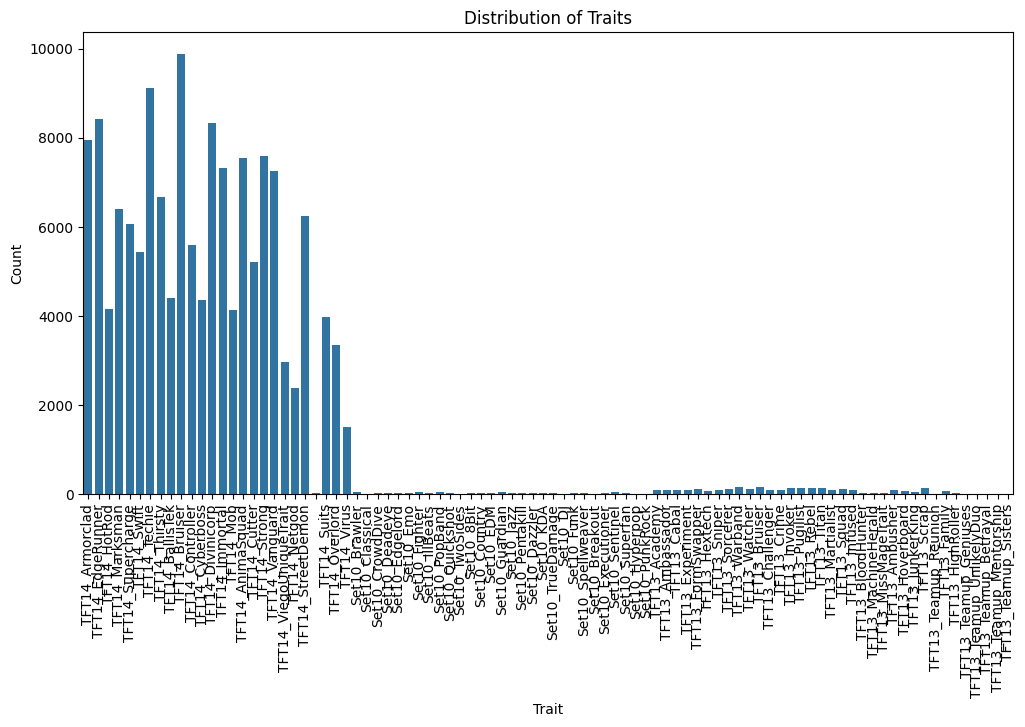

In [4]:
# Flatten the traits column, remove appended (#), and count occurrences
all_traits = [re.sub(r'\(\d+\)', '', trait).strip() for traits_list in match_list['traits'] for trait in traits_list]
trait_counts = Counter(all_traits)

# Create a histogram for traits
plt.figure(figsize=(12, 6))
sns.barplot(x=list(trait_counts.keys()), y=list(trait_counts.values()))
plt.xticks(rotation=90)
plt.title('Distribution of Traits')
plt.xlabel('Trait')
plt.ylabel('Count')
plt.show()

In [ ]:
# Flatten the units column and count occurrences
all_units = [unit for units_list in match_list['units'] for unit in units_list]
unit_counts = Counter(all_units)

# Create a histogram for units
plt.figure(figsize=(12, 6))
sns.barplot(x=list(unit_counts.keys()), y=list(unit_counts.values()))
plt.xticks(rotation=90)
plt.title('Distribution of Units')
plt.xlabel('Unit')
plt.ylabel('Count')
plt.show()